In [1]:
%pylab inline
import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.style.use('ggplot') ## gnuplot style

import numpy as np
import pandas as pd

import warnings as wn
import partial_corr # found at 
                    # https://gist.github.com/fabianp/9396204419c7b638d38f


#size
width, height=12,8
plt.rcParams['figure.figsize'] = width, height #aggiunta pt

#precision in tables
pd.set_option('precision',2)
#rows in tables
pd.set_option('display.max_rows', 1000)

# this is used for regression below; install (via pip) statsmodels and patsy
import statsmodels.formula.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# to chose a csv file in the current folder
import os
filesHere=os.listdir("./")
selected=[]
for i in range(len(filesHere)):
    if filesHere[i].find('_ts.csv')>0: selected.append(filesHere[i])
selected.sort()
for i in range(len(selected)):
    print (i, selected[i])

0 20180619_16-26-57_ts.csv
1 20180706_07-52-11_ts.csv
2 20180706_17-30-59_ts.csv
3 20180708_23-59-30_ts.csv
4 20180709_17-12-20_ts.csv
5 20180812_22-54-12_ts.csv
6 20180819_13-43-38_ts.csv
7 20180821_00-06-44_ts.csv
8 20180822_07-51-27_ts.csv
9 20180822_11-53-49_ts.csv
10 20180822_14-39-31_ts.csv
11 20180822_16-27-17_ts.csv
12 20180822_17-51-00_ts.csv
13 20180822_21-38-20_ts.csv
14 20180823_08-31-41_ts.csv
15 20180823_09-57-51_ts.csv
16 20180823_14-41-03_ts.csv
17 20180823_16-33-44_ts.csv
18 20180823_21-18-11_ts.csv
19 20180823_23-09-30_ts.csv
20 20180827_14-32-39_ts.csv
21 20180827_16-18-31_ts.csv
22 20180827_19-11-26_ts.csv
23 20180827_22-25-50_ts.csv
24 20180828_00-00-39_ts.csv
25 20180828_09-05-09_ts.csv
26 20180828_10-20-36_ts.csv
27 20180828_12-33-06_ts.csv
28 20180828_16-33-07_ts.csv
29 20180829_09-10-37_ts.csv
30 20180830_16-50-37_ts.csv
31 20180901_17-16-36_ts.csv
32 20180907_21-59-19_ts.csv
33 20180910_08-08-37_ts.csv
34 20180910_13-43-48_ts.csv
35 20180910_15-56-28_ts.csv
36

In [3]:
num=int(input("Choose a file via its number (>=0;<="+str(len(selected)-1)+" "))

try:
    modPars_df = pd.read_csv(selected[num][:17]+'_modPars.csv')
    modPars_df.index += 1 
except BaseException:
    modPars_df = pd.DataFrame([["no changes in parameters"]],columns=["  "])
    modPars_df.index += 1

firms=False
    
try:
    firms_df = pd.read_csv(selected[num][:17]+'_firms.csv')
    modPars_df.index += 1 
    firms=True
except BaseException:
    pass


par_df = pd.read_csv(selected[num][:17]+'_par.csv')
par_df.index += 1 

ts_df = pd.read_csv(selected[num])
#set index to start from 1, data are collected at the end of each period
ts_df.index += 1 

str_df = pd.read_csv(selected[num][:17]+'_str.csv')
#leave index to start from 0, data are collected at the beginning of each period

Choose a file via its number (>=0;<=79 79


***Parameters***

In [4]:
par_df.astype(str,errors='ignore')

,Parameter internal names,Parameter definitions,Values
1,projectVersion,project version,6
2,build,build,20181008
3,mySeed,seed (1 gets it from the clock),111
4,wage,wage base,1.0
5,socialWelfareCompensation,social welfare compensation,0.7
6,reUseUnspentConsumptionCapability,"reuse unspent consumption capability [0, 1]",0.5
7,laborProductivity,labor productivity,1
8,rho,expected employment ratio at t=1,0.9
9,a1,consumption behavior: a1,0.4
10,b1,consumption behavior: b1,0.55


***Modified parameters***

In [5]:
modPars_df.astype(str,errors='ignore')

,
2,no changes in parameters


***Time series, data collected at the end of each period***

In [6]:
ts_df

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
1,1102,-747.47,8908.00,8908.00,8908.00,2.31e-02,0.92,1.0
2,1937,-1163.41,8893.00,8898.76,8893.00,6.74e-02,0.87,1.0
3,963,-1066.44,9047.00,9051.16,9047.00,5.63e-02,0.89,1.0
4,1823,-1352.70,9157.87,9262.20,9157.87,7.42e-02,0.87,1.0
5,2178,-1545.12,8903.75,9069.61,8903.75,7.28e-02,0.85,1.0
6,2329,-1957.46,9077.00,9080.79,9077.00,4.07e-02,0.79,1.0
7,1011,-1771.89,8849.58,9002.77,8849.58,6.41e-02,0.82,1.0
8,2504,-2080.57,8956.00,8958.91,8956.00,1.68e-02,0.77,1.0
9,1047,-2019.12,8963.00,8966.17,8963.00,7.85e-03,0.77,1.0
10,1284,-1431.19,8726.00,8728.33,8726.00,6.99e-02,0.84,1.0


In [7]:
ts_df.describe()

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
count,50.00,50.00,50.00,50.00,50.00,5.00e+01,50.00,50.0
mean,1367.74,-1306.90,8817.27,8845.27,8817.27,6.78e-02,0.86,1.0
std,609.94,324.26,338.88,336.73,338.88,1.82e-02,0.04,0.0
min,619.00,-2080.57,8023.00,8024.50,8023.00,6.51e-03,0.77,1.0
25%,982.00,-1523.63,8621.25,8660.51,8621.25,6.48e-02,0.84,1.0
50%,1202.00,-1317.06,8887.00,8933.45,8887.00,7.54e-02,0.86,1.0
75%,1663.75,-1031.32,9043.75,9065.00,9043.75,7.71e-02,0.89,1.0
max,3867.00,-578.81,9391.00,9392.30,9391.00,8.41e-02,0.94,1.0


In [8]:
ts_df.corr(method="pearson").style.format("{:.2}")

,unemployed,totalProfit,totalProduction,plannedProduction,consumptionQ,hPriceSd,price,wage
unemployed,1.0,-0.039,-0.56,-0.5,-0.56,-0.027,-0.056,nan
totalProfit,-0.039,1.0,-0.26,-0.27,-0.26,0.089,0.97,nan
totalProduction,-0.56,-0.26,1.0,0.98,1.0,-0.21,-0.15,nan
plannedProduction,-0.5,-0.27,0.98,1.0,0.98,-0.19,-0.13,nan
consumptionQ,-0.56,-0.26,1.0,0.98,1.0,-0.21,-0.15,nan
hPriceSd,-0.027,0.089,-0.21,-0.19,-0.21,1.0,0.13,nan
price,-0.056,0.97,-0.15,-0.13,-0.15,0.13,1.0,nan
wage,nan,nan,nan,nan,nan,nan,nan,nan


The origin of the partial_corr source is [https://gist.github.com/fabianp/9396204419c7b638d38f](https://gist.github.com/fabianp/9396204419c7b638d38f)

At [http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression](http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression) we have the explanation of the need of augmenting the data matrix with a 1 to allow for a constant term in the regression.

In [9]:
wn.filterwarnings(action="ignore") # to eliminate a warning about 
                                   #LAPACK lib

np.set_printoptions(precision=3,suppress=True)
ts=ts_df.values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

partial_corr.partial_corr(ts_int)[1:, 1:]

array([[ 1.   ,  0.041,  0.012,  0.102, -0.013, -0.063, -0.047,  0.078],
       [ 0.041,  1.   , -0.046, -0.986,  0.046, -0.864,  1.   ,  0.   ],
       [ 0.012, -0.046,  1.   , -0.038,  1.   , -0.059,  0.048,  0.003],
       [ 0.102, -0.986, -0.038,  1.   ,  0.04 , -0.842,  0.987, -0.253],
       [-0.013,  0.046,  1.   ,  0.04 ,  1.   ,  0.062, -0.048, -0.004],
       [-0.063, -0.864, -0.059, -0.842,  0.062,  1.   ,  0.865, -0.   ],
       [-0.047,  1.   ,  0.048,  0.987, -0.048,  0.865,  1.   ,  0.   ],
       [ 0.078,  0.   ,  0.003, -0.253, -0.004, -0.   ,  0.   ,  1.   ]])

In [10]:
ts=ts_df.drop(columns="plannedProduction").values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

partial_corr.partial_corr(ts_int)[1:, 1:]

array([[ 1.   , -0.365,  0.009, -0.007, -0.277,  0.331, -0.028],
       [-0.365,  1.   , -0.036,  0.04 , -0.381,  0.982,  0.049],
       [ 0.009, -0.036,  1.   ,  1.   , -0.054,  0.056, -0.001],
       [-0.007,  0.04 ,  1.   ,  1.   ,  0.053, -0.057, -0.15 ],
       [-0.277, -0.381, -0.054,  0.053,  1.   ,  0.388, -0.044],
       [ 0.331,  0.982,  0.056, -0.057,  0.388,  1.   ,  0.01 ],
       [-0.028,  0.049, -0.001, -0.15 , -0.044,  0.01 ,  1.   ]])

In [11]:
ts=ts_df.drop(columns="totalProduction").values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

partial_corr.partial_corr(ts_int)[1:, 1:]

array([[ 1.   ,  0.04 ,  0.102, -0.135, -0.063, -0.047,  0.004],
       [ 0.04 ,  1.   , -0.986,  0.98 , -0.864,  1.   , -0.026],
       [ 0.102, -0.986,  1.   ,  0.999, -0.842,  0.987, -0.018],
       [-0.135,  0.98 ,  0.999,  1.   ,  0.83 , -0.981, -0.018],
       [-0.063, -0.864, -0.842,  0.83 ,  1.   ,  0.865, -0.   ],
       [-0.047,  1.   ,  0.987, -0.981,  0.865,  1.   ,  0.   ],
       [ 0.004, -0.026, -0.018, -0.018, -0.   ,  0.   ,  1.   ]])

In [12]:
result = sm.ols(formula="totalProfit ~ price + wage + totalProduction + unemployed", \
                data=ts_df).fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:            totalProfit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     405.1
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           4.54e-33
Time:                        12:36:06   Log-Likelihood:                -276.74
No. Observations:                  50   AIC:                             561.5
Df Residuals:                      46   BIC:                             569.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3656.4708    209.850    -

***Structural infos, data collected at the beginning of each period***

In [13]:
str_df

,entrepreneurs,workers
0,10,10000
1,10,10000
2,9,10001
3,9,10001
4,8,10002
5,7,10003
6,6,10004
7,6,10004
8,5,10005
9,5,10005


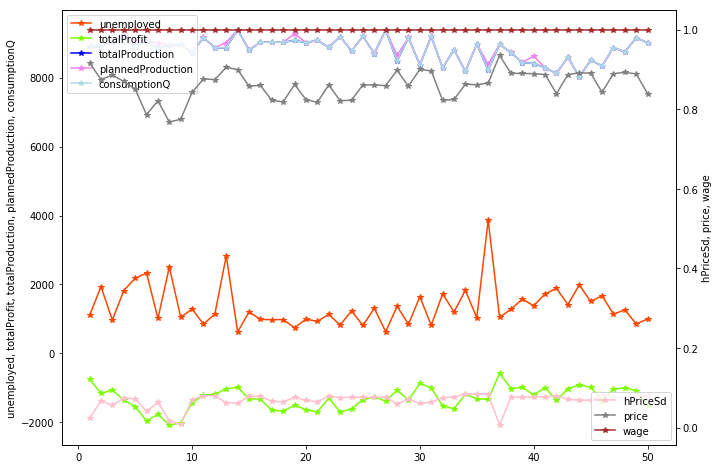

In [14]:
myPlot = ts_df.plot(figsize=(11,8),secondary_y=['hPriceSd', 'price','wage'],marker="*",
color=["OrangeRed","LawnGreen","Blue","Violet","lightblue","Pink","Gray","Brown"])
myPlot.set_ylabel('unemployed, totalProfit, totalProduction, plannedProduction, consumptionQ')
myPlot.right_ax.set_ylabel('hPriceSd, price, wage')
myPlot.legend(loc='upper left') #, bbox_to_anchor=(-0.35, 0.5)
myPlot.axes.right_ax.legend(loc='lower right') #, bbox_to_anchor=(1.1, 0.5)

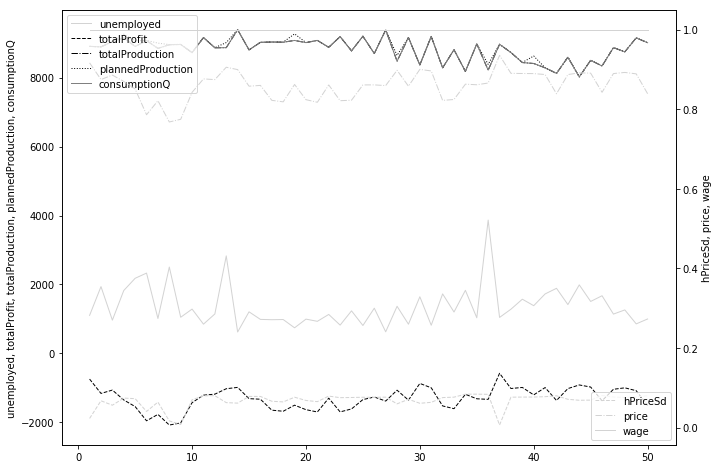

In [44]:
myPlot = ts_df.plot(figsize=(11,8),secondary_y=['hPriceSd', 'price','wage'],marker="",
color=["lightgray","Black","Black","Black","Gray","lightgray","lightgray","lightgray"],
style=['-', '--', '-.', ':','-', '--', '-.'],
linewidth=1.)
myPlot.set_ylabel('unemployed, totalProfit, totalProduction, plannedProduction, consumptionQ')
myPlot.right_ax.set_ylabel('hPriceSd, price, wage')
myPlot.legend(loc='upper left') #, bbox_to_anchor=(-0.35, 0.5)
myPlot.axes.right_ax.legend(loc='lower right') #, bbox_to_anchor=(1.1, 0.5)

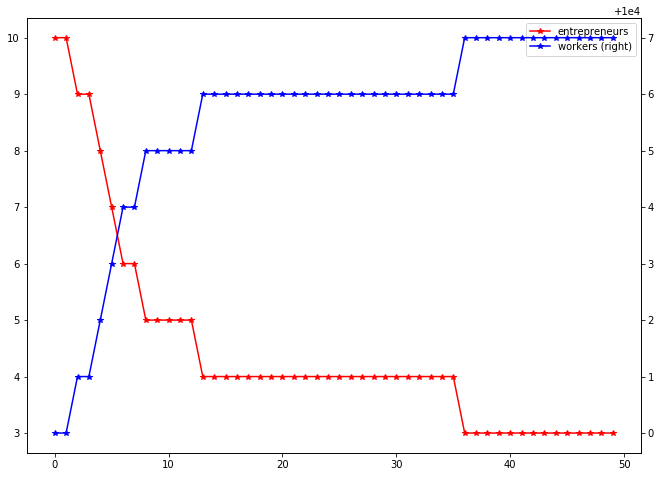

In [15]:
str_df.plot(figsize=(11,8),secondary_y='workers',marker="*",color=["r","b"])

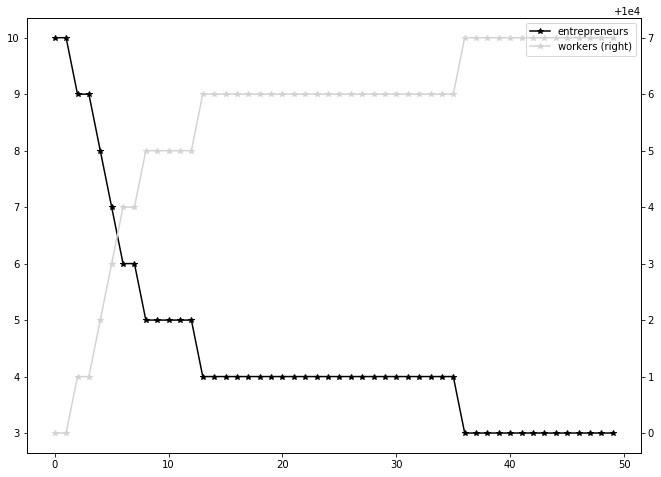

In [16]:
str_df.plot(figsize=(11,8),secondary_y='workers',marker="*",color=["black","lightgrey"])

Best solutions to produce a LaTeX table from these data (the example is related to ts_df.corr table):

    corr=ts_df.corr(method='pearson')
    print corr.to_latex()
    
    "print" to have the output nicely formatted; copy and paste it to LaTeX and the 
    result works.
    
To use caption and label with tabular simply include that output within:

    \begin{table}
    
    output above
    
    \label{a label}
    \caption{a caption}
    \end{table}

    You can add the usual [htbp] specification as \begin{table}[htbp]


Other solutions:
1. online [http://www.tablesgenerator.com](http://www.tablesgenerator.com), reading the csv file;
2. using a converter as [http://html2latex.sourceforge.net](http://html2latex.sourceforge.net).

## The first method is applied in the cell below.

In [17]:
corr=ts_df.corr(method='pearson')
def ff(x):
    return '%1.2f' % x
print (corr.to_latex(formatters=[ff,ff,ff,ff,ff,ff,ff,ff]))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & unemployed & totalProfit & totalProduction & plannedProduction & consumptionQ & hPriceSd & price & wage \\
\midrule
unemployed        &       1.00 &       -0.04 &           -0.56 &             -0.50 &        -0.56 &    -0.03 & -0.06 &  nan \\
totalProfit       &      -0.04 &        1.00 &           -0.26 &             -0.27 &        -0.26 &     0.09 &  0.97 &  nan \\
totalProduction   &      -0.56 &       -0.26 &            1.00 &              0.98 &         1.00 &    -0.21 & -0.15 &  nan \\
plannedProduction &      -0.50 &       -0.27 &            0.98 &              1.00 &         0.98 &    -0.19 & -0.13 &  nan \\
consumptionQ      &      -0.56 &       -0.26 &            1.00 &              0.98 &         1.00 &    -0.21 & -0.15 &  nan \\
hPriceSd          &      -0.03 &        0.09 &           -0.21 &             -0.19 &        -0.21 &     1.00 &  0.13 &  nan \\
price             &      -0.06 &        0.97 &           -0.15 &             -0.1

## *Data from each firm in each period*

In [18]:
if firms: print(firms_df.describe())
else: print('no data for each firm in each period')

       production  profit        0
count         0.0  224.00   224.00
mean          NaN -291.72  1968.14
std           NaN  185.33   653.25
min           NaN -725.52   820.00
25%           NaN -466.99  1428.00
50%           NaN -205.77  2102.00
75%           NaN -134.53  2396.75
max           NaN  -48.51  3186.00
